In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
clean_df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [3]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     10689 non-null  int64 
 1   region                         10689 non-null  object
 2   customer_lifetime_value        10689 non-null  int64 
 3   response                       10689 non-null  object
 4   coverage                       10689 non-null  object
 5   education                      10689 non-null  object
 6   effective_to_date              10689 non-null  object
 7   month                          10689 non-null  object
 8   employment_status              10689 non-null  object
 9   gender                         10689 non-null  object
 10  income                         10689 non-null  int64 
 11  location_code                  10689 non-null  object
 12  marital_status                 10689 non-null  object
 13  m

In [4]:
numerical = clean_df.select_dtypes('int64')
numerical.describe()

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000
mean,5344.000000,8011.906727,51757.468987,93.190196,15.140425,48.100571,0.387501,2.980821,434.227243
std,3085.792848,6877.557889,24967.653440,34.413111,10.075678,27.934300,0.914320,2.399497,292.550878
min,0.000000,1898.000000,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2672.000000,4014.000000,29095.000000,68.000000,6.000000,24.000000,0.000000,1.000000,269.000000
50%,5344.000000,5776.000000,50144.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.000000
75%,8016.000000,8991.000000,72517.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.000000
max,10688.000000,83325.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.000000


In [5]:
categorical = clean_df.select_dtypes('object')
len(categorical.columns)+len(numerical.columns)==len(clean_df.columns)

True

Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DAB7C2D2C8>,
      dtype=object)

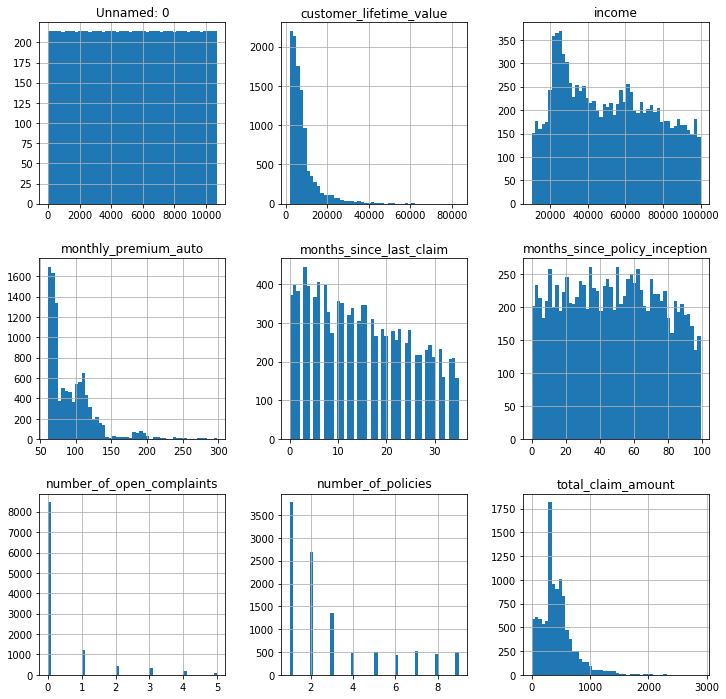

In [10]:
numerical.hist(figsize=(12,12), bins=50)

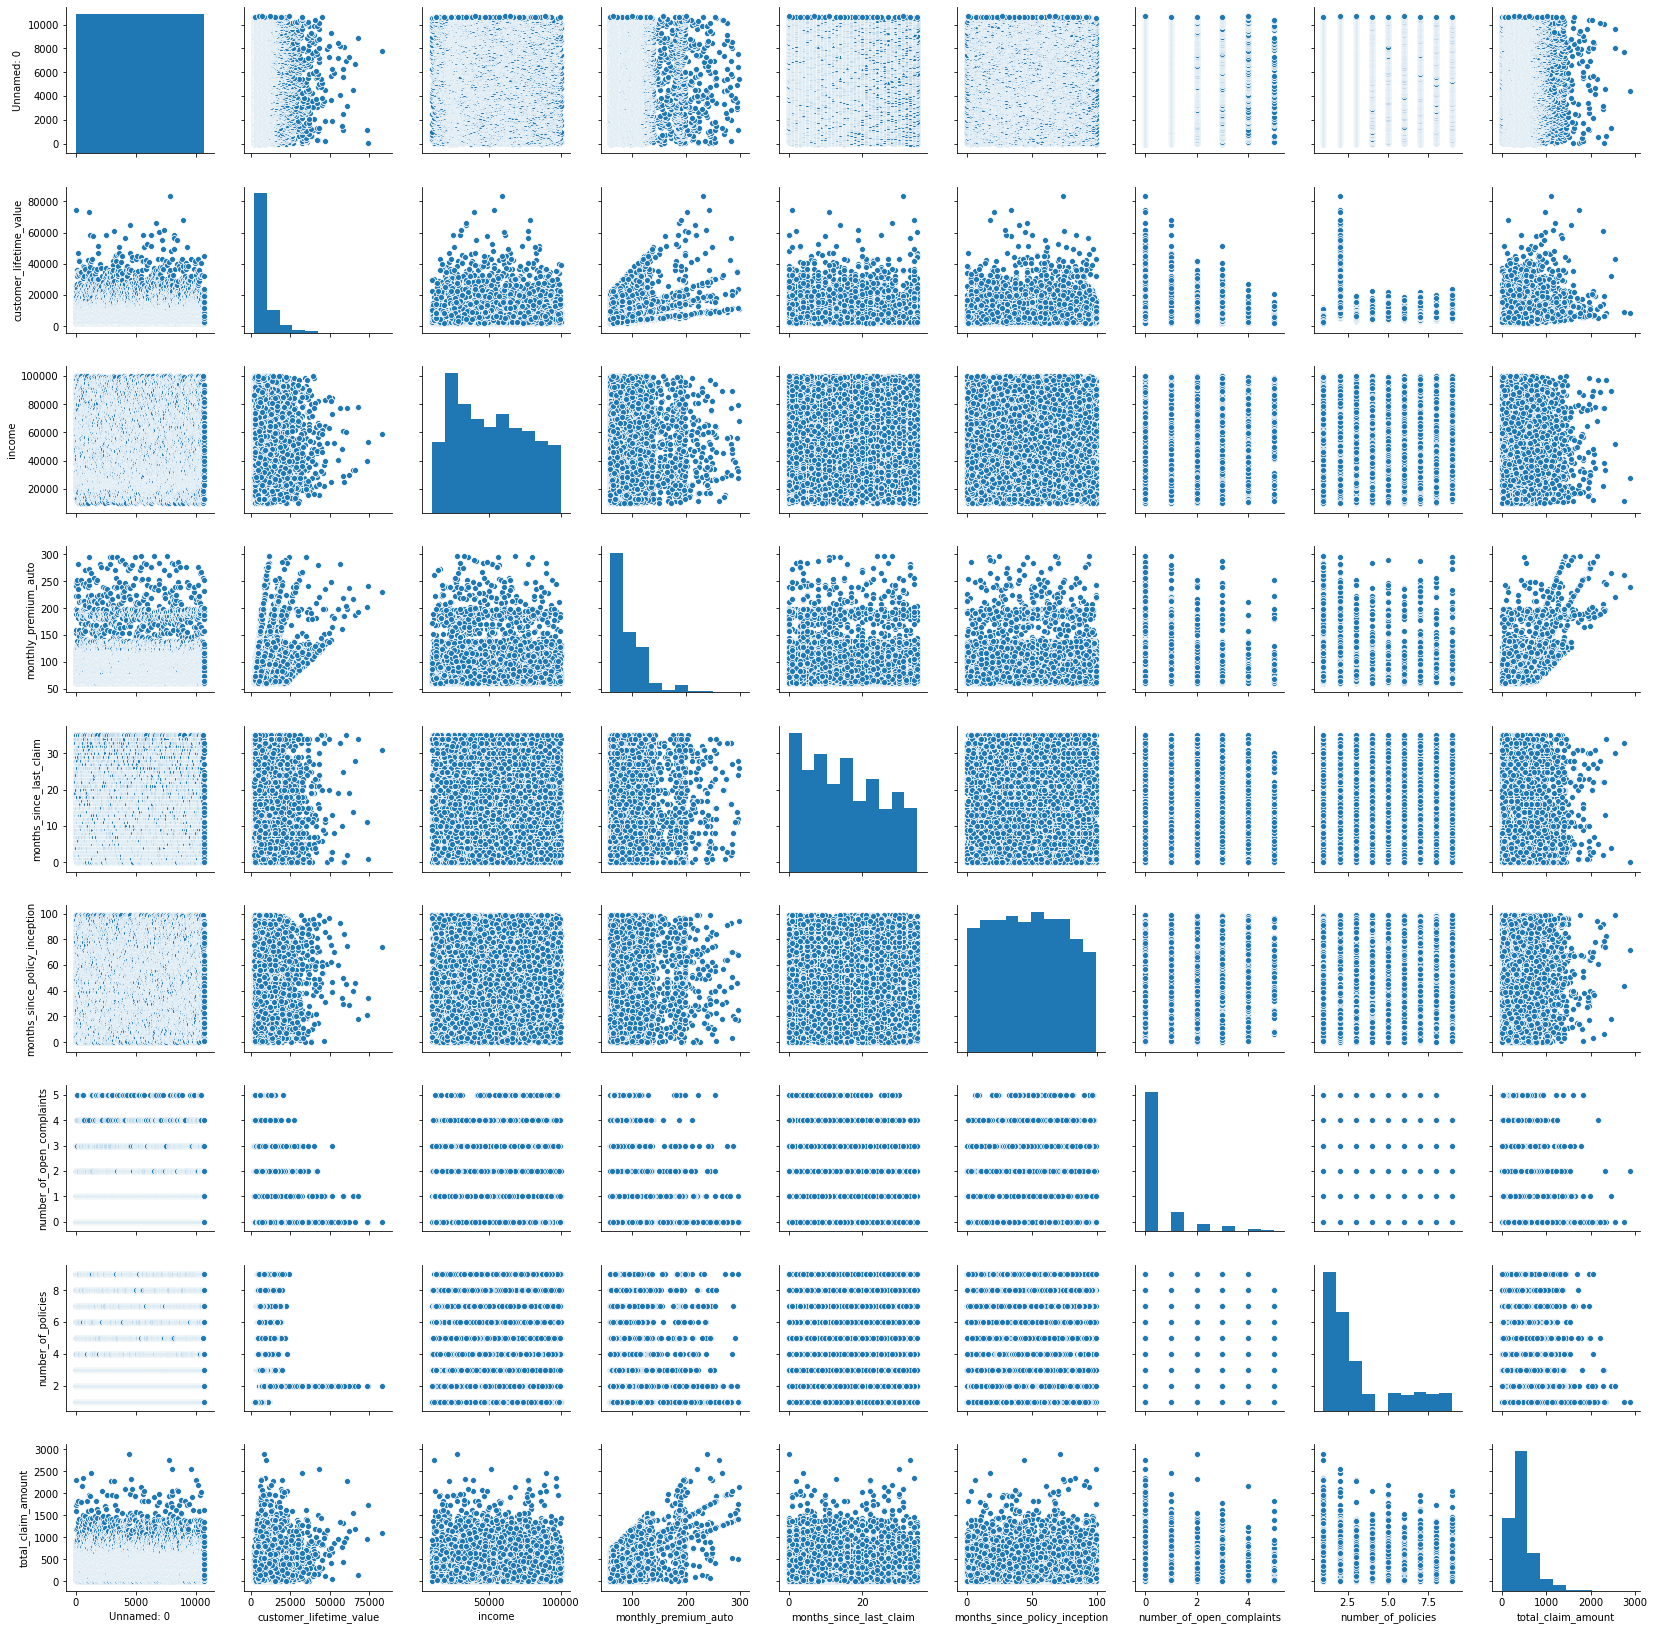

In [7]:
sns.pairplot(numerical)

- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable.

In [11]:
clean_df.corr()

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Unnamed: 0,1.000000,0.000914,-0.004264,-0.001076,0.009031,0.013202,0.005535,0.002737,-0.003809
customer_lifetime_value,0.000914,1.000000,-0.000276,0.404235,0.012466,0.017055,-0.028099,0.016789,0.232849
income,-0.004264,-0.000276,1.000000,-0.010804,-0.018013,0.011509,0.013057,-0.001515,-0.118201
monthly_premium_auto,-0.001076,0.404235,-0.010804,1.000000,0.006959,0.019696,-0.002423,-0.018805,0.630149
months_since_last_claim,0.009031,0.012466,-0.018013,0.006959,1.000000,-0.036883,-0.002617,0.006791,0.008979
months_since_policy_inception,0.013202,0.017055,0.011509,0.019696,-0.036883,1.000000,0.004368,-0.009719,0.004186
number_of_open_complaints,0.005535,-0.028099,0.013057,-0.002423,-0.002617,0.004368,1.000000,0.002748,-0.007332
number_of_policies,0.002737,0.016789,-0.001515,-0.018805,0.006791,-0.009719,0.002748,1.000000,-0.008019
total_claim_amount,-0.003809,0.232849,-0.118201,0.630149,0.008979,0.004186,-0.007332,-0.008019,1.000000


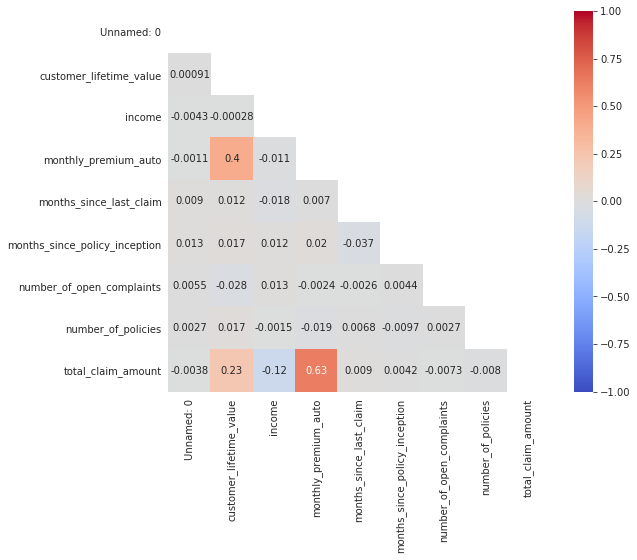

In [12]:
corr = clean_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

Show a plot of the total number of responses.

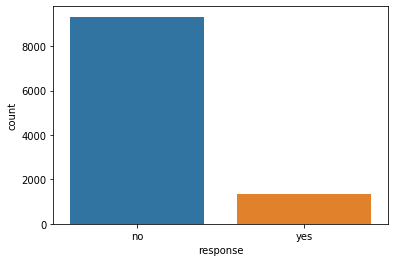

In [15]:
ax = sns.countplot(x="response", data=clean_df)

Show a plot of the response rate by the sales channel

In [20]:
clean_df['sales_channel'].value_counts()

agent          4019
branch         2975
call center    2099
web            1596
Name: sales_channel, dtype: int64

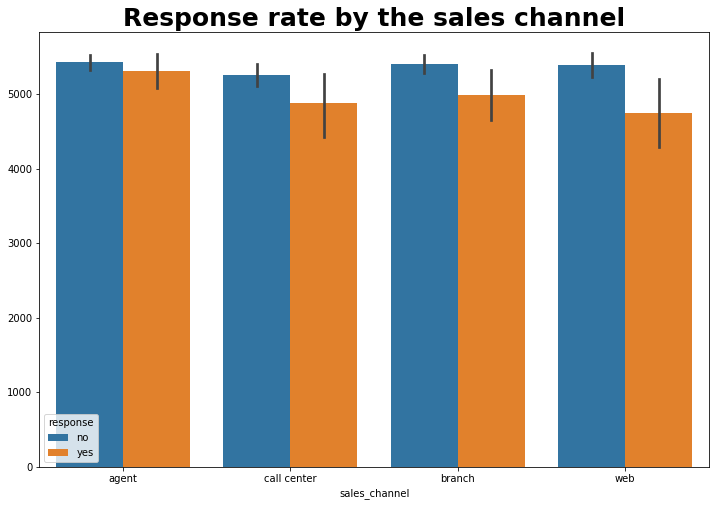

In [25]:
fig4, ax4 = plt.subplots(figsize = (12,8))
ax4.set_title('Response rate by the sales channel', size='25', fontweight='bold')

sns.barplot(x =clean_df['sales_channel'] , y = clean_df.index, hue = clean_df['response']b , ax = ax4)

Show a plot of the response rate by the total claim amount

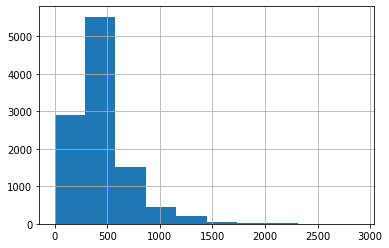

In [29]:
clean_df.loc[:,'total_claim_amount'].hist()

In [42]:
clean_df['total_claim_amount'][clean_df['response']=='no'].max

2893

In [43]:
clean_df['total_claim_amount'][clean_df['response']=='yes'].max()

2092

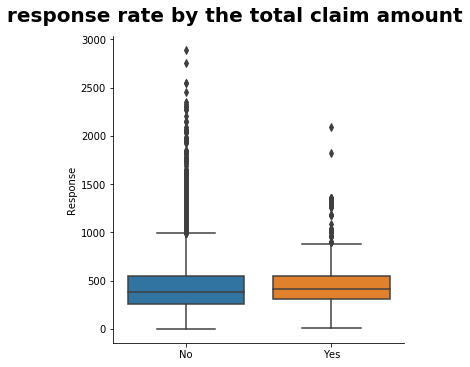

In [45]:
fg7 = sns.catplot(x='response', y = 'total_claim_amount', data = clean_df, kind="box", margin_titles = True)
fg7.fig.suptitle('response rate by the total claim amount', size='20', fontweight='bold', y = 1.05)
fg7.set_xticklabels(['No', 'Yes'])
fg7.set_ylabels('Response')
fg7.set_xlabels('')

Show a plot of the response rate by income

In [48]:
clean_df['income'][clean_df['response']=='no'].mean()

52402.58201114923

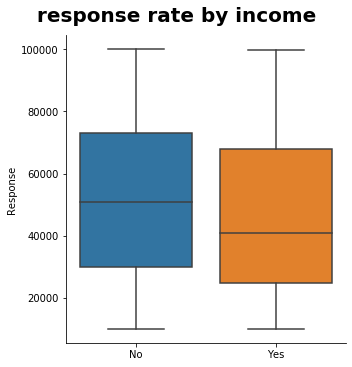

In [49]:
fg7 = sns.catplot(x='response', y = 'income', data = clean_df, kind="box", margin_titles = True)
fg7.fig.suptitle('response rate by income', size='20', fontweight='bold', y = 1.05)
fg7.set_xticklabels(['No', 'Yes'])
fg7.set_ylabels('Response')
fg7.set_xlabels('')